In [8]:
import torch
from torch import tensor
import matplotlib.pyplot as plt

In [20]:
N, D_in, H, D_out = 100, 1, 5, 1

In [21]:
x = torch.ones(N,D_in); #x.size()
_ = x.uniform_(0., 1.)

In [22]:
b = torch.rand(N); b[:5], b.shape # added some noise
#b = tensor([2.])#, 
a = tensor([3.])#, 
y = (x**2)@a  + b

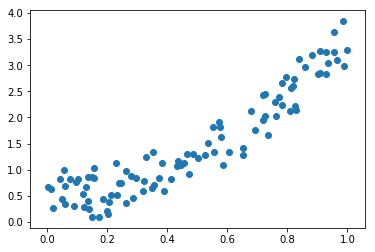

In [23]:
plt.scatter(x, y)

In [24]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [25]:
# https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_nn.html

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4 # is the best parameter.
for t in range(10000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred.squeeze(), y)
    #print(y_pred.squeeze().shape, y.shape)
    if t % 500 == 499:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

499 28.68339729309082
999 10.787192344665527
1499 9.235660552978516
1999 8.556863784790039
2499 8.323880195617676
2999 8.222210884094238
3499 8.15451717376709
3999 8.11330795288086
4499 8.088359832763672
4999 8.066932678222656
5499 8.051618576049805
5999 8.04338550567627
6499 8.036893844604492
6999 8.03153133392334
7499 8.027006149291992
7999 8.023193359375
8499 8.020000457763672
8999 8.017403602600098
9499 8.015236854553223
9999 8.013404846191406


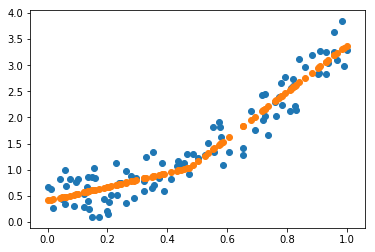

In [26]:
plt.scatter(x, y)
plt.scatter(x, model(x).detach().numpy())

In [28]:
model

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 1.7603],
        [-0.3435],
        [-0.9751],
        [-0.9612],
        [ 0.0423]], requires_grad=True)
Parameter containing:
tensor([-0.8309, -0.3333,  0.9587, -0.9228, -0.0443], requires_grad=True)
Parameter containing:
tensor([[ 1.7788,  0.2813, -1.3595,  0.2289,  0.1381]], requires_grad=True)
Parameter containing:
tensor([1.7113], requires_grad=True)


## Explain the Neural Network Architecture
#### What are the transformations.

In [ ]:
# Do a class representation of the same.